In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
infile = '/Users/yuntse/data/coherent/preLArTPC/geant4/CR1M/cosmic_g4_0000.root'

In [3]:
df = pd.DataFrame(ROOT.RDataFrame("edep", infile).AsNumpy())

In [4]:
df

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
0,12.731841,-2712.904160,-132.821630,6982.100527,0,0,13,10750.850399,-2683.434573,-150.263857,7000.000000,3
1,4.837000,-2722.859871,-126.933574,6976.049304,0,0,13,10737.669933,-2712.904160,-132.821630,6982.100527,3
2,2.342634,-2728.577189,-123.549460,6972.573686,0,0,13,10732.350500,-2722.859871,-126.933574,6976.049304,3
3,10.142081,-2751.162211,-110.183971,6958.864657,0,0,13,10722.746066,-2728.577189,-123.549460,6972.573686,3
4,25.156361,-2806.523779,-77.472289,6925.288587,0,0,13,10711.191447,-2751.162211,-110.183971,6958.864657,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6460375,0.032553,3510.563436,4548.477334,6991.847115,999,1217,11,0.543551,3510.565335,4548.480442,6991.848838,1221
6460376,0.002757,3514.145638,4548.708412,6991.485418,999,1217,11,0.513756,3514.145595,4548.708414,6991.485385,1220
6460377,0.005610,3509.894072,4550.886610,6971.672935,999,1217,11,0.516609,3509.894123,4550.886651,6971.673105,1219
6460378,0.000013,3512.986566,4555.486253,6980.270155,999,1010,22,0.025754,3513.005290,4556.269888,6981.320786,1216


In [6]:
# unit in mm, half the dimension
# Fiducial volume
FX = 250.
FY = 200.
FZ = 250.
# TPC volume
TPCX = 300.
TPCY = 250.
TPCZ = 300.

In [7]:
edf = df[np.abs(df.pdg)==11]

In [8]:
edfF = edf[(np.abs(edf.startX) <= FX) & (np.abs(edf.startY) <= FY) & (np.abs(edf.startZ) <= FZ) & \
        (np.abs(edf.endX) <= FX) & (np.abs(edf.endY) <= FY) & (np.abs(edf.endZ) <= FZ)]
edfF

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
1501902,0.281466,57.119645,127.429437,-246.996200,229,2,11,0.792465,56.991177,127.302683,-246.870879,391
1501903,0.385784,51.011825,136.548537,-222.950179,229,2,11,1.415622,50.939017,136.033617,-221.932815,390
1501904,0.295972,51.314547,136.411693,-223.393636,229,2,11,1.029838,51.011825,136.548537,-222.950179,390
1501905,0.222867,51.359336,136.552789,-223.361155,229,2,11,0.733866,51.314547,136.411693,-223.393636,390
1501906,0.351247,36.421627,157.956091,-157.596242,229,2,11,1.287736,35.586606,158.117082,-157.169000,389
...,...,...,...,...,...,...,...,...,...,...,...,...
5036536,0.383276,-79.050369,-128.044492,163.378300,781,3,11,1.433337,-79.689703,-128.905133,163.842988,207
5036537,0.399213,-79.073622,-127.777003,162.858403,781,3,11,1.050061,-79.050369,-128.044492,163.378300,207
5036538,0.139849,-79.027542,-127.812615,162.898223,781,3,11,0.650847,-79.073622,-127.777003,162.858403,207
5036539,0.395749,-84.439879,-110.651021,232.567987,781,3,11,1.279174,-84.044737,-110.976995,233.354589,206


In [9]:
edfEdge1 = edf[(np.abs(edf.startX) <= FX) & (np.abs(edf.startY) <= FY) & (np.abs(edf.startZ) <= FZ) & \
            ((np.abs(edf.endX) > FX) | (np.abs(edf.endY) > FY) | (np.abs(edf.endZ) > FZ))]
edfEdge1

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID


In [10]:
edfEdge2 = edf[((np.abs(edf.startX) > FX) | (np.abs(edf.startY) > FY) | (np.abs(edf.startZ) > FZ)) & \
            (np.abs(edf.endX) <= FX) & (np.abs(edf.endY) <= FY) & (np.abs(edf.endZ) <= FZ)]
edfEdge2

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
3514096,4.115041,248.856267,-113.478977,245.725426,547,3,11,17.526873,253.800906,-116.425067,263.830089,244


In [11]:
edfOut = edf[~((np.abs(edf.startX) <= FX) & (np.abs(edf.startY) <= FY) & (np.abs(edf.startZ) <= FZ) & \
             (np.abs(edf.endX) <= FX) & (np.abs(edf.endY) <= FY) & (np.abs(edf.endZ) <= FZ)) & \
             (np.abs(edf.startX) <= TPCX) & (np.abs(edf.startY) <= TPCY) & (np.abs(edf.startZ) <= TPCZ) & \
             (np.abs(edf.endX) <= TPCX) & (np.abs(edf.endY) <= TPCY) & (np.abs(edf.endZ) <= TPCZ)]
edfOut

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
1152895,0.153584,-221.988731,-241.788211,285.619619,165,2542,11,0.664583,-221.930952,-241.805885,285.675747,2555
1501917,0.302264,6.910830,200.842192,-37.502701,229,2,11,1.229315,7.238205,201.495912,-37.108997,387
1501918,0.285314,6.964991,200.655031,-37.151526,229,2,11,0.927051,6.910830,200.842192,-37.502701,387
1501919,0.130739,6.917227,200.615684,-37.163407,229,2,11,0.641738,6.964991,200.655031,-37.151526,387
1501920,0.329176,6.987129,201.493831,-37.093903,229,2,11,0.840175,7.198603,201.570943,-36.926394,386
...,...,...,...,...,...,...,...,...,...,...,...,...
5036552,0.185985,-86.686783,-100.988151,272.897801,781,3,11,1.231717,-86.121940,-100.591975,273.208120,204
5036553,0.362557,-86.826344,-101.210642,272.449750,781,3,11,1.005707,-86.686783,-100.988151,272.897801,204
5036554,0.123566,-86.845106,-101.156622,272.446124,781,3,11,0.634565,-86.826344,-101.210642,272.449750,204
5036556,0.005378,-86.797653,-101.204003,272.486388,781,238,11,0.516377,-86.797549,-101.204227,272.486335,239


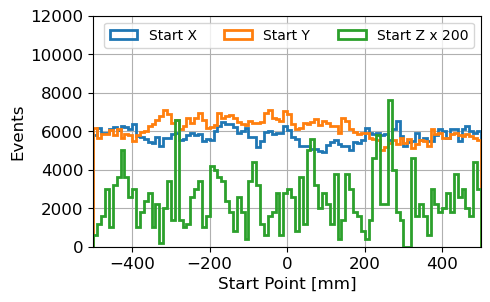

In [14]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(df.startX, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'Start X')
ax.hist(df.startY, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'Start Y')
ax.hist(df.startZ, weights = np.full_like(df.startZ, 200), bins = np.linspace(-500, 500, 101), 
        histtype = 'step', lw = 2, label = 'Start Z x 200')

ax.set_xlabel( r'Start Point [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [-500., 500.])
ax.set_ylim( [0, 12000])

ax.grid(":")
ax.legend( ncol = 3)

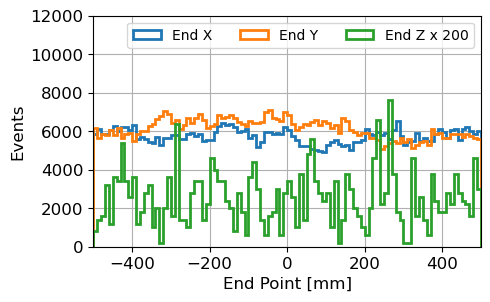

In [15]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(df.endX, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'End X')
ax.hist(df.endY, bins = np.linspace(-500, 500, 101), histtype = 'step', lw = 2, label = 'End Y')
ax.hist(df.endZ, weights = np.full_like(df.endZ, 200), bins = np.linspace(-500, 500, 101), 
        histtype = 'step', lw = 2, label = 'End Z x 200')

ax.set_xlabel( r'End Point [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [-500, 500])
ax.set_ylim( [0, 12000])

ax.grid(":")
ax.legend( ncol = 3)

In [16]:
ActiveVolume = ( ( -300.0, +300.0 ), ( -250.0, +250.0 ), ( -300.0, +300.0 ) )
def selInActiveVolume(colX, colY, colZ):
    return df[colX].between(*ActiveVolume[0]) & df[colY].between(*ActiveVolume[1]) & df[colZ].between(*ActiveVolume[2])

In [30]:
def particleLength( startX, startY, startZ, endX, endY, endZ ):
    start = np.array([ startX, startY, startZ ])
    end = np.array([ endX, endY, endZ ])
    return np.sqrt( np.sum([ dL**2 for dL in end-start ]) )

In [27]:
# Caveat: select the steps with either the start or the end point in the active volume
muInActive = df[(selInActiveVolume('startX', 'startY', 'startZ')|selInActiveVolume('endX', 'endY', 'endZ'))&(np.abs(df.pdg)==13)]
eInActive = df[(selInActiveVolume('startX', 'startY', 'startZ')|selInActiveVolume('endX', 'endY', 'endZ'))&(np.abs(df.pdg)==11)]

In [28]:
muInActive

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
1501848,4.903008,-15.691699,244.001819,67.984891,229,0,13,1142.750101,-21.460267,254.054749,93.494618,2
1501849,2.959573,-12.254875,237.931863,52.836892,229,0,13,1137.407792,-15.691699,244.001819,67.984891,2
1501850,2.426893,-9.574721,232.909953,40.394813,229,0,13,1134.131598,-12.254875,237.931863,52.836892,2
1501851,4.579416,-3.918447,222.201355,14.214460,229,0,13,1130.290455,-9.574721,232.909953,40.394813,2
1501852,8.238418,4.511718,206.500806,-24.812760,229,0,13,1125.259002,-3.918447,222.201355,14.214460,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5036471,8.970860,-71.127372,-218.127912,-139.010954,781,0,13,279.869314,-70.753812,-204.483268,-94.993704,3
5036472,3.721079,-71.636565,-223.507000,-157.066962,781,0,13,270.539811,-71.127372,-218.127912,-139.010954,3
5036473,11.965306,-76.504166,-241.200317,-215.925951,781,0,13,266.404768,-71.636565,-223.507000,-157.066962,3
5036474,12.903840,-79.431613,-248.082059,-280.691306,781,0,13,254.002914,-76.504166,-241.200317,-215.925951,3


In [29]:
eInActive

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
1152895,0.153584,-221.988731,-241.788211,285.619619,165,2542,11,0.664583,-221.930952,-241.805885,285.675747,2555
1501902,0.281466,57.119645,127.429437,-246.996200,229,2,11,0.792465,56.991177,127.302683,-246.870879,391
1501903,0.385784,51.011825,136.548537,-222.950179,229,2,11,1.415622,50.939017,136.033617,-221.932815,390
1501904,0.295972,51.314547,136.411693,-223.393636,229,2,11,1.029838,51.011825,136.548537,-222.950179,390
1501905,0.222867,51.359336,136.552789,-223.361155,229,2,11,0.733866,51.314547,136.411693,-223.393636,390
...,...,...,...,...,...,...,...,...,...,...,...,...
5036552,0.185985,-86.686783,-100.988151,272.897801,781,3,11,1.231717,-86.121940,-100.591975,273.208120,204
5036553,0.362557,-86.826344,-101.210642,272.449750,781,3,11,1.005707,-86.686783,-100.988151,272.897801,204
5036554,0.123566,-86.845106,-101.156622,272.446124,781,3,11,0.634565,-86.826344,-101.210642,272.449750,204
5036556,0.005378,-86.797653,-101.204003,272.486388,781,238,11,0.516377,-86.797549,-101.204227,272.486335,239


In [31]:
muL = np.array([ particleLength( row.startX, row.startY, row.startZ, row.endX, row.endY, row.endZ)  for row in muInActive.itertuples( index = False) ])

In [32]:
muL.max()

132.3160041135137

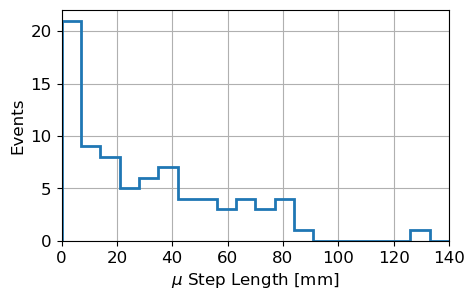

In [37]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(muL, bins = np.linspace(0, 140, 21), histtype = 'step', lw = 2)

ax.set_xlabel( r'$\mu$ Step Length [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 140])

ax.grid(":")

In [34]:
eL = np.array([ particleLength( row.startX, row.startY, row.startZ, row.endX, row.endY, row.endZ)  for row in eInActive.itertuples( index = False) ])

In [35]:
eL.max()

18.997571303866966

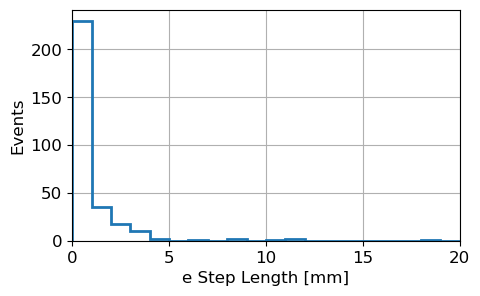

In [38]:
fig, ax = plt.subplots( figsize = (5, 3) )  

ax.hist(eL, bins = np.linspace(0, 20, 21), histtype = 'step', lw = 2)

ax.set_xlabel( r'e Step Length [mm]', fontsize = 12 )
ax.set_ylabel( r'Events', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 20])

ax.grid(":")

In [39]:
pInActive = df[(selInActiveVolume('startX', 'startY', 'startZ')|selInActiveVolume('endX', 'endY', 'endZ'))&(np.abs(df.pdg)==2212)]

In [40]:
pInActive

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
